<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/Cifar100_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100 
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

print(x_train.shape) 
print(y_train.shape) 
print(x_test.shape) 
print(y_test.shape) 

169001437/169001437 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
#reshape
x_train = x_train.reshape(50000, 32, 32, 3) # 1 la 1 kenh
x_test = x_test.reshape(10000, 32, 32, 3)

print(x_train.shape)
print(x_test.shape)

x_train = x_train.astype('float32')
x_train = x_train/255

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
from keras.utils import to_categorical #chuyen 1 vector sang 1 mang binary

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
#Tao mo hinh
from keras.models import Sequential, Model
from keras import Input
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization,  LeakyReLU
from keras.optimizers import Adam

batch_size = 64 #lo^ hoc
epochs = 20
classes = 100 #phan ra 100 loai (lop)

In [11]:
model = Sequential()

#Bo 32
model.add((Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (32, 32, 3), padding = 'same'))) #32 so lan tich chap, bo filter 3,3, padding same la tich chap xong kich thuoc van nhu ban dau
model.add(LeakyReLU(alpha = 0.1)) #layer 1 (lop tich chap)
model.add(MaxPooling2D((2,2), padding = 'same')) #layer 2 (maxpooling)

#Bo 64
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

#Bo 128
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2), padding = 'same'))

In [12]:
from keras.backend import categorical_crossentropy
#Dua vao ANN
model.add(Flatten()) #làm phẳng kết quả đầu ra của lớp trước đód
model.add(Dense(128, activation = 'linear')) #lớp ẩn có 128 lớp
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(classes, activation = 'softmax')) #output ra 100 lớp (classes = 100 ở trên)

In [13]:
#compile
from keras.losses import categorical_crossentropy

model.compile(loss = categorical_crossentropy, optimizer = Adam(), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [14]:
#train
train = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 1)

Epoch 1/20
782/782 [==============================] - 12s 5ms/step - loss: 3.5810 - accuracy: 0.1616
Epoch 2/20
782/782 [==============================] - 4s 4ms/step - loss: 2.7360 - accuracy: 0.3142
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 2.3253 - accuracy: 0.3993
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 2.0370 - accuracy: 0.4631
Epoch 5/20
782/782 [==============================] - 4s 4ms/step - loss: 1.7876 - accuracy: 0.5201
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 1.5653 - accuracy: 0.5717
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 1.3678 - accuracy: 0.6204
Epoch 8/20
782/782 [==============================] - 4s 4ms/step - loss: 1.1847 - accuracy: 0.6643
Epoch 9/20
782/782 [==============================] - 4s 4ms/step - loss: 1.0154 - accuracy: 0.7079
Epoch 10/20
782/782 [==============================] - 4s 5ms/step - loss: 0.8554 - accuracy: 0.749

In [15]:
#Hiển thị giá trị
eval = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss: ', eval[0]) #giá trị mất mát
print('Test accuracy: ', eval[1]) #giá trị accuracy

Test loss:  2063.290771484375
Test accuracy:  0.1695999950170517


Text(0.5, 1.0, 'Traing & Testing Accuracy')

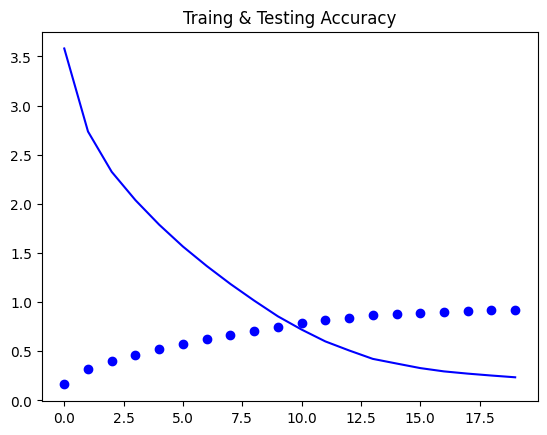

In [17]:
import matplotlib.pyplot as plt
#Vẽ
accuracy = train.history['accuracy']
loss = train.history['loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, loss, 'b', label = 'Test Accuracy')
plt.title('Traing & Testing Accuracy')

In [18]:
#lưu data
model.save('/content/drive/MyDrive/Colab Notebooks/Cifar100_CNN/model_Cifar100_CNN.h5')